<h5> Import all required libraries. </h5>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<i> <b>Import Dataset </b></i>

In [2]:
dataset=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [3]:
#view first five record of data
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#view the shape of dataset
dataset.shape

(25, 2)

In [5]:
# use describe() for more information
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


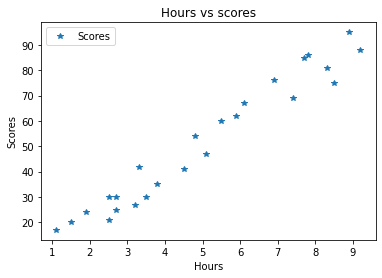

In [6]:
# plotting the distribution of scores
dataset.plot(x='Hours',y='Scores',style='*')
plt.title('Hours vs scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()


<i><b>From above graph we can conclude that there is a positive linear relation between the number of hours studied and the percentage of score.</b></i>

In [7]:
#Divide the data into attribute and target
X=dataset.iloc[:, :-1].values
Y=dataset.iloc[:,1].values

<i><b>split this data into training and testing sets</b></i>

In [8]:
#Import the required libraries
from sklearn.model_selection import train_test_split

In [9]:
#Data split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=0)

<i><b> Training the Algorithm </b></i>

In [10]:
#Import LinearRegression 
from sklearn.linear_model import LinearRegression

In [11]:
#Fit the data
LinearReg=LinearRegression()
LinearReg.fit(X_train,Y_train)

LinearRegression()

In [12]:
# Print the shape to verify the split
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(20, 1) (5, 1) (20,) (5,)


In [13]:
#print intercept
print('Estimated intercept %.2f'%LinearReg.intercept_)

Estimated intercept 2.02


In [14]:
#Print coefficent
print('The coefficent %d'%len(LinearReg.coef_))

The coefficent 1


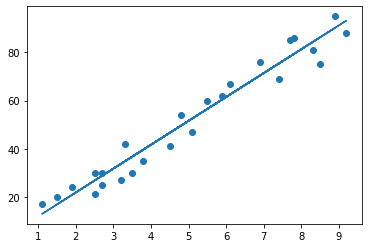

In [15]:
#Plot the regression line
line = LinearReg.coef_*X+LinearReg.intercept_

#Plot the test data
plt.scatter(X,Y)
plt.plot(X,line);
plt.show()

<i><b> Making prediction </b></i>

In [16]:
print(X_test)
#predicting the scores
y_pred=LinearReg.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [17]:
#Comparing Actual Vs Predicted 
df=pd.DataFrame({'Actual':Y_test,'predicted':y_pred})

In [18]:
#print
df

,Actual,predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [19]:
#Predicting score for student studing for 9.25 hr/day
hours=9.25
own_pred=LinearReg.predict([[hours]])
print('No of hours={}'.format(hours))
print('Estimat perdiction={}'.format(own_pred[0]))

No of hours=9.25
Estimat perdiction=93.69173248737535


<i><b> Evaluating the Model </b></i>

In [20]:
from sklearn import metrics
print('Mean Absoulte Error',
             metrics.mean_absolute_error(Y_test,y_pred))

Mean Absoulte Error 4.183859899002975


<b> We can evaluate the model using different metrics such as R Square/ Adjusted R Square, 
 Mean Square Error (MSE)/ Root Mean Square Error (RMSE) and Mean Absolute Error (MAE).
 Here we are using Mean Absolute Error method </b>